#importing libraries

In [92]:
pip install  seaborn


     ------------------------------------ 294.6/294.6 kB 444.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib. pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv('deaths.csv')
df

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332518,ZWE,Africa,Zimbabwe,8/5/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332519,ZWE,Africa,Zimbabwe,8/6/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332520,ZWE,Africa,Zimbabwe,8/7/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332521,ZWE,Africa,Zimbabwe,8/8/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA CLEANING
## dropping unuseful columns

In [3]:

df.drop(columns=['new_cases_smoothed','new_deaths_smoothed_per_million','reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
                'weekly_hosp_admissions','weekly_hosp_admissions_per_million'],inplace=True)
df.drop(columns=['new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','total_cases_per_million','new_deaths_smoothed'],inplace=True)
df

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,0.0
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,0.0
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,0.0
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,0.0
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
332518,ZWE,Africa,Zimbabwe,8/5/2023,16320539,265693.0,0.0,5712.0,0.0
332519,ZWE,Africa,Zimbabwe,8/6/2023,16320539,265693.0,0.0,5712.0,0.0
332520,ZWE,Africa,Zimbabwe,8/7/2023,16320539,265693.0,0.0,5712.0,0.0
332521,ZWE,Africa,Zimbabwe,8/8/2023,16320539,265693.0,0.0,5712.0,0.0


In [10]:
df.shape

(332523, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332523 entries, 0 to 332522
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   iso_code      332523 non-null  object        
 1   continent     316712 non-null  object        
 2   location      332523 non-null  object        
 3   date          332523 non-null  datetime64[ns]
 4   population    332523 non-null  int64         
 5   total_cases   295008 non-null  float64       
 6   new_cases     323383 non-null  float64       
 7   total_deaths  273840 non-null  float64       
 8   new_deaths    323443 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 22.8+ MB


## cleaning data

#changin data types

change date column data type into datetime

In [4]:
import datetime as dt

In [5]:
df['date']=pd.to_datetime(df['date'])

splitting date column into years it containg 4 years i willmake it every years own data

2020 data

In [6]:
desired_year=2020
data_2020=df[df['date'].dt.year==desired_year]
data_2020

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,2020-01-03,41128772,NaN,0.0,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-04,41128772,NaN,0.0,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-05,41128772,NaN,0.0,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-06,41128772,NaN,0.0,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-07,41128772,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
331567,ZWE,Africa,Zimbabwe,2020-12-27,16320539,12963.0,83.0,341.0,0.0
331568,ZWE,Africa,Zimbabwe,2020-12-28,16320539,13077.0,114.0,349.0,8.0
331569,ZWE,Africa,Zimbabwe,2020-12-29,16320539,13148.0,71.0,354.0,5.0
331570,ZWE,Africa,Zimbabwe,2020-12-30,16320539,13325.0,177.0,359.0,5.0


## Analayzing only 2020 data

### splittng date column to add month and day columns 

In [7]:
data_2020['month']=data_2020['date'].dt.month
data_2020['day']=data_2020['date'].dt.day
data_2020

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_24412\1210656304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['month']=data_2020['date'].dt.month
C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_24412\1210656304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['day']=data_2020['date'].dt.day


,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,month,day
0,AFG,Asia,Afghanistan,2020-01-03,41128772,NaN,0.0,NaN,0.0,1,3
1,AFG,Asia,Afghanistan,2020-01-04,41128772,NaN,0.0,NaN,0.0,1,4
2,AFG,Asia,Afghanistan,2020-01-05,41128772,NaN,0.0,NaN,0.0,1,5
3,AFG,Asia,Afghanistan,2020-01-06,41128772,NaN,0.0,NaN,0.0,1,6
4,AFG,Asia,Afghanistan,2020-01-07,41128772,NaN,0.0,NaN,0.0,1,7
...,...,...,...,...,...,...,...,...,...,...,...
331567,ZWE,Africa,Zimbabwe,2020-12-27,16320539,12963.0,83.0,341.0,0.0,12,27
331568,ZWE,Africa,Zimbabwe,2020-12-28,16320539,13077.0,114.0,349.0,8.0,12,28
331569,ZWE,Africa,Zimbabwe,2020-12-29,16320539,13148.0,71.0,354.0,5.0,12,29
331570,ZWE,Africa,Zimbabwe,2020-12-30,16320539,13325.0,177.0,359.0,5.0,12,30


largest population countries in 2020

In [8]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['population'].max().reset_index().sort_values(by='population',ascending=False)
grouped_df

,location,population
42,China,1425887360
96,India,1417173120
227,United States,338289856
97,Indonesia,275501344
160,Pakistan,235824864
...,...,...
69,Falkland Islands,3801
153,Niue,1952
215,Tokelau,1893
232,Vatican,808


In [9]:
px.histogram(grouped_df,x='location',y='population',color='location')

## most country affected covid19 in 2020

In [10]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['total_cases'].max().reset_index().sort_values(by='total_cases',ascending=False)
grouped_df

,location,total_cases
227,United States,19577585.0
96,India,10266674.0
28,Brazil,7563551.0
175,Russia,3159297.0
226,United Kingdom,2563561.0
...,...,...
215,Tokelau,NaN
216,Tonga,NaN
220,Turkmenistan,NaN
222,Tuvalu,NaN


we see that usa is the most country who got effected covid19 around 19million people found covid 19

EXPLORATORY DATA ANALYSIS ON MOST COUNTRY EFFECTED BY COVID19 IN 2020

In [11]:
fig=px.bar(grouped_df,x='location',y='total_cases',color='location',text='total_cases',height=600)
fig.update_traces(textposition='outside')
fig
#loc=data_2020['location'].unique()

countries who got most of new cases of covid19 in 2020

In [12]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['new_cases'].max().reset_index().sort_values(by='new_cases',ascending=False)
grouped_df

,location,new_cases
72,France,332505.0
227,United States,246505.0
78,Germany,174589.0
202,Spain,144877.0
96,India,97894.0
...,...,...
93,Hong Kong,NaN
156,Northern Ireland,NaN
188,Scotland,NaN
209,Taiwan,NaN


In [13]:
fig = px.bar(grouped_df, x='location', y='new_cases', color='location',title='Max New Cases by Location',text='new_cases',height=600)
fig.update_traces(textposition='outside')
labels=({'location': 'Location', 'new_cases': 'Max New Cases'})
fig

In [14]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['new_deaths'].max().reset_index().sort_values(by='new_deaths',ascending=False)
grouped_df

,location,new_deaths
78,Germany,6460.0
202,Spain,5841.0
72,France,5602.0
59,Ecuador,3800.0
227,United States,3389.0
...,...,...
93,Hong Kong,NaN
156,Northern Ireland,NaN
188,Scotland,NaN
209,Taiwan,NaN


In [15]:
px.area(grouped_df,x='location',y='new_deaths',facet_col_wrap=25)

#continent and new_deaths

In [16]:
continent_deaths=data_2020.groupby('continent')['total_deaths'].sum().reset_index().sort_values(by='total_deaths',ascending=True)
continent_deaths

,continent,total_deaths
4,Oceania,160576.0
0,Africa,7367275.0
1,Asia,37989440.0
5,South America,57472140.0
2,Europe,66426459.0
3,North America,70671477.0


<Axes: ylabel='continent'>

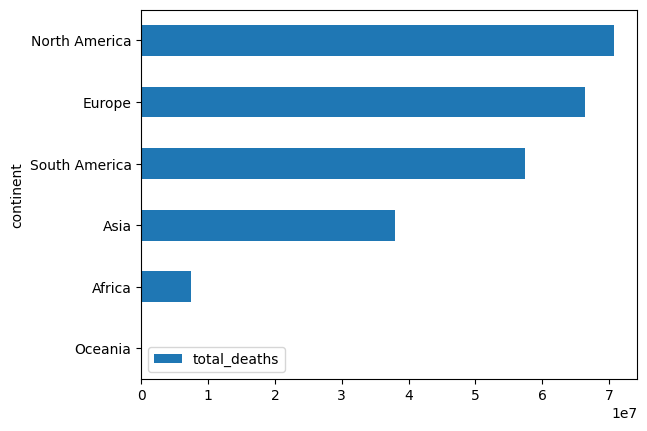

In [17]:
continent_deaths.plot(kind='barh',x='continent',y='total_deaths')


#months most people died 

In [18]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]
mont=filtered_df.groupby(['month','location'])['total_deaths'].sum().reset_index().sort_values(by='total_deaths',ascending=False)


In [20]:
fig=px.area(mont,x='month',y='total_deaths')
 
fig

what is the day that most people died in 2020?

In [21]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]
mont=filtered_df.groupby(['day','location'])['total_deaths'].sum().reset_index().sort_values(by='total_deaths',ascending=False)
mont

,day,location,total_deaths
7187,30,United States,1705415.0
6947,29,United States,1693712.0
6707,28,United States,1683022.0
6467,27,United States,1672946.0
6227,26,United States,1659600.0
...,...,...,...
5393,23,Kyrgyzstan,0.0
1748,8,Faeroe Islands,0.0
1749,8,Falkland Islands,0.0
5390,23,Kiribati,0.0


2021 data

In [20]:
desired_year=2021
data_2021=df[df['date'].dt.year==desired_year]
data_2021

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
364,AFG,Asia,Afghanistan,2021-01-01,41128772,52513.0,183.0,2201.0,12.0
365,AFG,Asia,Afghanistan,2021-01-02,41128772,52586.0,73.0,2211.0,10.0
366,AFG,Asia,Afghanistan,2021-01-03,41128772,52709.0,123.0,2221.0,10.0
367,AFG,Asia,Afghanistan,2021-01-04,41128772,52909.0,200.0,2230.0,9.0
368,AFG,Asia,Afghanistan,2021-01-05,41128772,53011.0,102.0,2237.0,7.0
...,...,...,...,...,...,...,...,...,...
331932,ZWE,Africa,Zimbabwe,2021-12-27,16320539,204351.0,605.0,4891.0,6.0
331933,ZWE,Africa,Zimbabwe,2021-12-28,16320539,205449.0,1098.0,4908.0,17.0
331934,ZWE,Africa,Zimbabwe,2021-12-29,16320539,207548.0,2099.0,4940.0,32.0
331935,ZWE,Africa,Zimbabwe,2021-12-30,16320539,209655.0,2107.0,4967.0,27.0


2022 data

In [21]:
desired_year=2022
data_2022=df[df['date'].dt.year==desired_year]
data_2022

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
729,AFG,Asia,Afghanistan,2022-01-01,41128772,158059.0,0.0,7356.0,0.0
730,AFG,Asia,Afghanistan,2022-01-02,41128772,158112.0,53.0,7356.0,0.0
731,AFG,Asia,Afghanistan,2022-01-03,41128772,158156.0,44.0,7361.0,5.0
732,AFG,Asia,Afghanistan,2022-01-04,41128772,158171.0,15.0,7364.0,3.0
733,AFG,Asia,Afghanistan,2022-01-05,41128772,158207.0,36.0,7366.0,2.0
...,...,...,...,...,...,...,...,...,...
332297,ZWE,Africa,Zimbabwe,2022-12-27,16320539,259969.0,22.0,5635.0,0.0
332298,ZWE,Africa,Zimbabwe,2022-12-28,16320539,259982.0,13.0,5635.0,0.0
332299,ZWE,Africa,Zimbabwe,2022-12-29,16320539,260015.0,33.0,5635.0,0.0
332300,ZWE,Africa,Zimbabwe,2022-12-30,16320539,260059.0,44.0,5636.0,1.0


2023 data

In [22]:
desired_year=2023
data_2023=df[df['date'].dt.year==desired_year]
data_2023

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
1094,AFG,Asia,Afghanistan,2023-01-01,41128772,207579.0,25.0,7849.0,0.0
1095,AFG,Asia,Afghanistan,2023-01-02,41128772,207585.0,6.0,7849.0,0.0
1096,AFG,Asia,Afghanistan,2023-01-03,41128772,207644.0,59.0,7849.0,0.0
1097,AFG,Asia,Afghanistan,2023-01-04,41128772,207696.0,52.0,7850.0,1.0
1098,AFG,Asia,Afghanistan,2023-01-05,41128772,207714.0,18.0,7850.0,0.0
...,...,...,...,...,...,...,...,...,...
332518,ZWE,Africa,Zimbabwe,2023-08-05,16320539,265693.0,0.0,5712.0,0.0
332519,ZWE,Africa,Zimbabwe,2023-08-06,16320539,265693.0,0.0,5712.0,0.0
332520,ZWE,Africa,Zimbabwe,2023-08-07,16320539,265693.0,0.0,5712.0,0.0
332521,ZWE,Africa,Zimbabwe,2023-08-08,16320539,265693.0,0.0,5712.0,0.0
